**-----> During the data loading phase, I encountered an issue with the default encoding used by pandas when reading the CSV file. Initially, I attempted to load the data using the 'unicode_escape' encoding, but this resulted in a unicodeescape codec error due to unescaped backslashes in the file. To resolve this, I experimented with several alternative encodings and found that the 'ISO-8859-1 (Latin-1)'encoding successfully read the file without errors.**

1. <u>**DATA EXPLORATION**</u>

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [3]:

# Reading the CSV file into a DataFrame
dataframe = pd.read_csv(r"C:\Users\Aarya\Desktop\NEXUS\TwitterSentiment.csv")


In [4]:
# Dsiplaying the number of rows and columns present in the dataframe respectively
dataframe.shape

(1599999, 6)

In [5]:
# Listing the names of all the columns present in the dataframe
dataframe.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [6]:
# Basic information about the dataframe df: rows , columns , types 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

**------> We can see that our dataset do not include the column names and is identifying the first record as the header of each column so we need to specify each column name in our dataset for a better understanding.**

In [7]:

# Defining the column names
column_names = ['Target', 'ID', 'Date', 'Flag', 'Username', 'Tweet']

# Reading the CSV file into a DataFrame with specified column names
df = pd.read_csv( r"C:\Users\Aarya\Desktop\NEXUS\TwitterSentiment.csv", names=column_names )


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Target    1600000 non-null  int64 
 1   ID        1600000 non-null  int64 
 2   Date      1600000 non-null  object
 3   Flag      1600000 non-null  object
 4   Username  1600000 non-null  object
 5   Tweet     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
df.head()

,Target,ID,Date,Flag,Username,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


***----------------------------------------------------------------------------------------------------------------------------------***

2. <u>**DATA CLEANING**</u>

In [10]:
# checking for any null values in the dataframe
df.isnull().sum()

Target      0
ID          0
Date        0
Flag        0
Username    0
Tweet       0
dtype: int64

In [11]:
# Finding duplicate entries
duplicate_entries = df.duplicated()
print("Duplicate entries:")
print(df[duplicate_entries])


Duplicate entries:
Empty DataFrame
Columns: [Target, ID, Date, Flag, Username, Tweet]
Index: []


<u>**CONCLUSION**</U>

**Our data set neither contains any sort of null values or duplicate values , hence our data set is clean.**

In [12]:
#Changing the datatype of 'Date'
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Aarya\AppData\Local\Temp\ipykernel_2616\3594748014.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   Target    1600000 non-null  int64         
 1   ID        1600000 non-null  int64         
 2   Date      1600000 non-null  datetime64[ns]
 3   Flag      1600000 non-null  object        
 4   Username  1600000 non-null  object        
 5   Tweet     1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


***-------------------------------------------------------------------------------------------------------------------------------***

<u>**3.  EXPLORATORY DATA ANALYSIS (EDA)**</u>

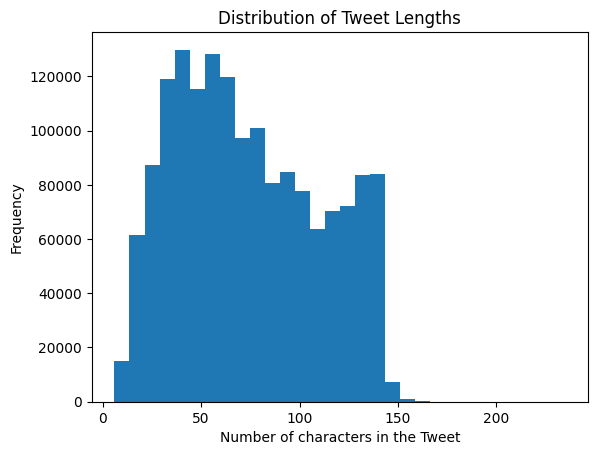

In [14]:
df['Number of characters in the Tweet'] = df['Tweet'].apply(len)
plt.hist(df['Number of characters in the Tweet'], bins=30)
plt.xlabel('Number of characters in the Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

**<u>CONCLUSION</U>**
1. Social media platforms often impose character limits on tweets, such as Twitter's 280-character limit. As a result, most tweets tend to fall within a relatively narrow range of lengths, typically shorter than the maximum allowed characters.
2. Users may tend to write tweets of similar lengths due to various factors such as attention span, readability, or the nature of the content being shared.

In [15]:
# Finding the number of unique IDs

print("Number of total IDs:", df['ID'].count())
print("Number of unique IDs:", df['ID'].nunique())


Number of total IDs: 1600000
Number of unique IDs: 1598315


**<u>CONCLUSION</u>**
1. A large number of unique user IDs here suggests a significant customer base or user population interaction.
2. It also indicates the Application's ability to reach a diverse range of users or customers across different demographics, regions, or segments.
3. The presence of a large number of unique user IDs also reflects high levels of customer engagement.

***-------------------------------------------------------------------------------------------------------------------------------***

**<u> 4. SENTIMENT DISTRIBUTION</u>**

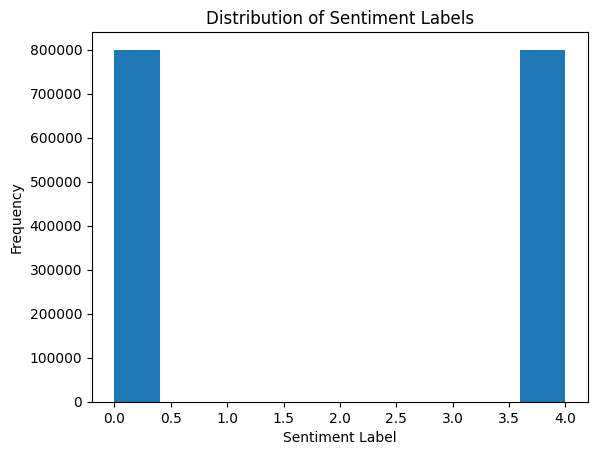

In [16]:
# Ploting histogram of sentiment labels
plt.hist(df['Target'])
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Labels')
plt.show()


**<u>CONCLUSION</u>**

**1. It suggests that the dataset is evenly balanced between the two sentiment classes.**

**2. Balanced datasets can be beneficial for training machine learning models, as they prevent biases towards one class over the other.**

**3. However, it's essential to be cautious of potential biases or limitations that may arise from a balanced dataset. For example, the balanced distribution may not reflect real-world sentiment distribution**

***-------------------------------------------------------------------------------------------------------------------------------***

In [17]:
df.head()

,Target,ID,Date,Flag,Username,Tweet,Number of characters in the Tweet
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111


**<u>5. WORD FREQUENCY ANALYSIS</u>**

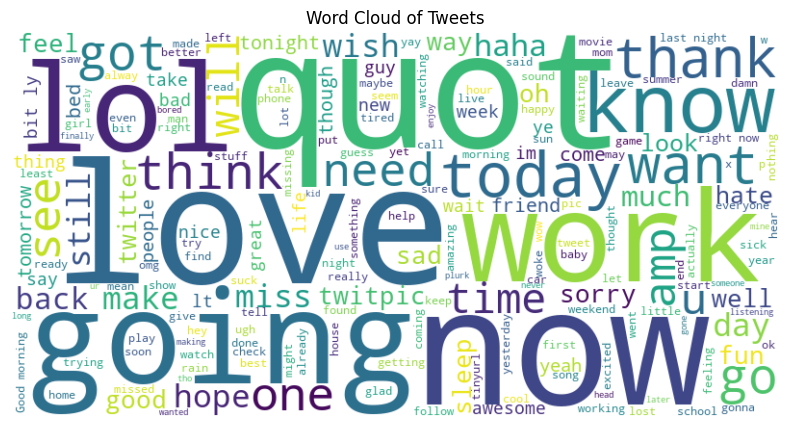

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Tweet']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

**<u>CONCLUSION</u>**

**The larger and more prominent words in the word cloud represent the most frequently occurring words in the tweets. These words are likely to be common topics or themes discussed by users on the platform.**

***--------------------------------------------------------------------------------------------------------------------------------***

**<u>6. TEMPORAL ANALYSIS</u>**

In [19]:


# Finding the oldest and most recent dates
min_date = df['Date'].min()
max_date = df['Date'].max()

# Print the range of the time
print(f"Range of the time in the dataset: {min_date} to {max_date}")


Range of the time in the dataset: 2009-04-06 22:19:45 to 2009-06-25 10:28:31


**--------> We can say that our dataset contains data for the month of 'April' , 'May' and 'June'.**

In [20]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek

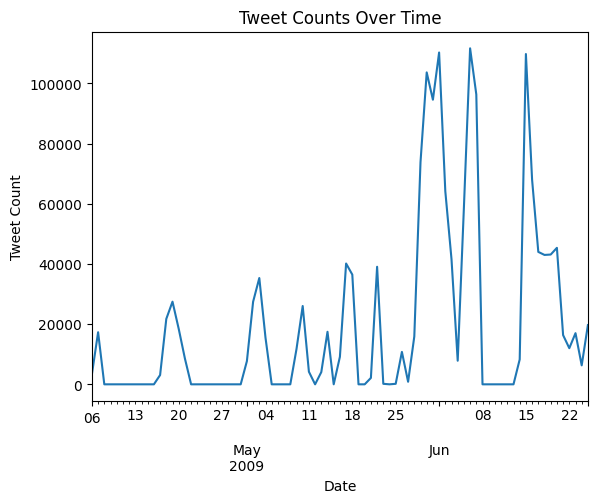

In [21]:
df.set_index('Date').resample('D').size().plot()
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts Over Time')
plt.show()

**CONCLUSION :** 
**The tweet counts or we can say the user engagement peaked in the:**

**i. last week of May**

**ii. First week and third week of June**

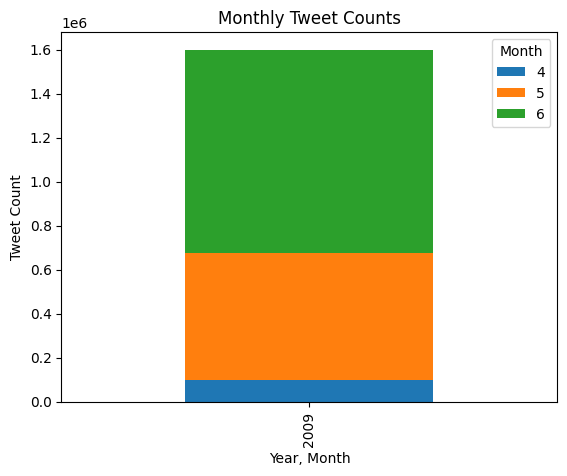

In [22]:
df.groupby(['Year', 'Month']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Year, Month')
plt.ylabel('Tweet Count')
plt.title('Monthly Tweet Counts')
plt.show()


**<u>CONCLUSION</u>**

**This again shows that the number of tweets peaked in the 6th month i.e. in the month of 'June'**

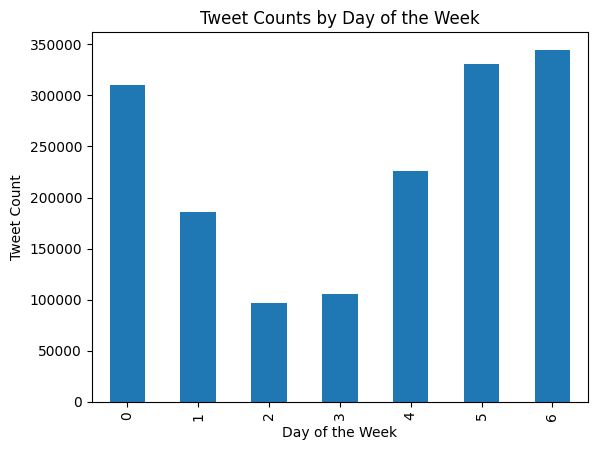

In [23]:
df.groupby('DayOfWeek').size().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts by Day of the Week')
plt.show()


**<u>CONCLUSION</u>**

**The higher user engagement to the Twitter and therefore higher number of tweets were ussually seen during the weekends and least during the weekdays and that too during the midweek.**

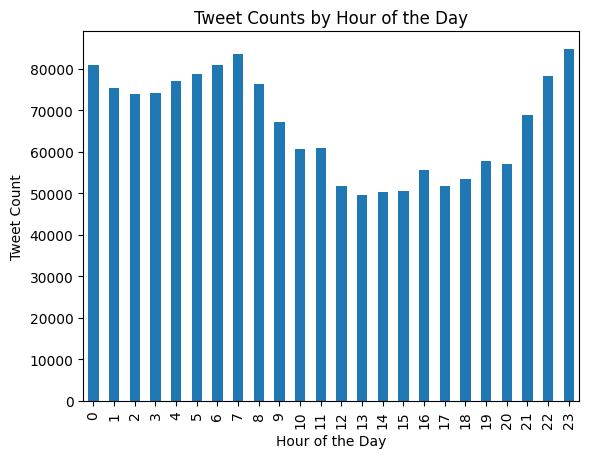

In [24]:
df.groupby('Hour').size().plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts by Hour of the Day')
plt.show()


**<u>CONCLUSION</u>**

**The higher user engagement to the Twitter is usually seen during late night and early morning and it is least during the afternoon**

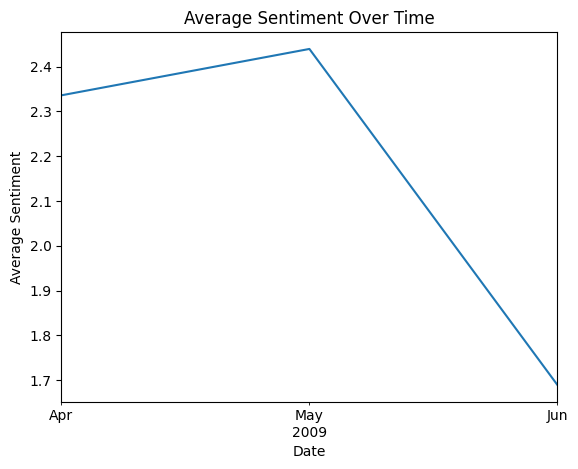

In [25]:
df.set_index('Date').resample('ME')['Target'].mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Over Time')
plt.show()


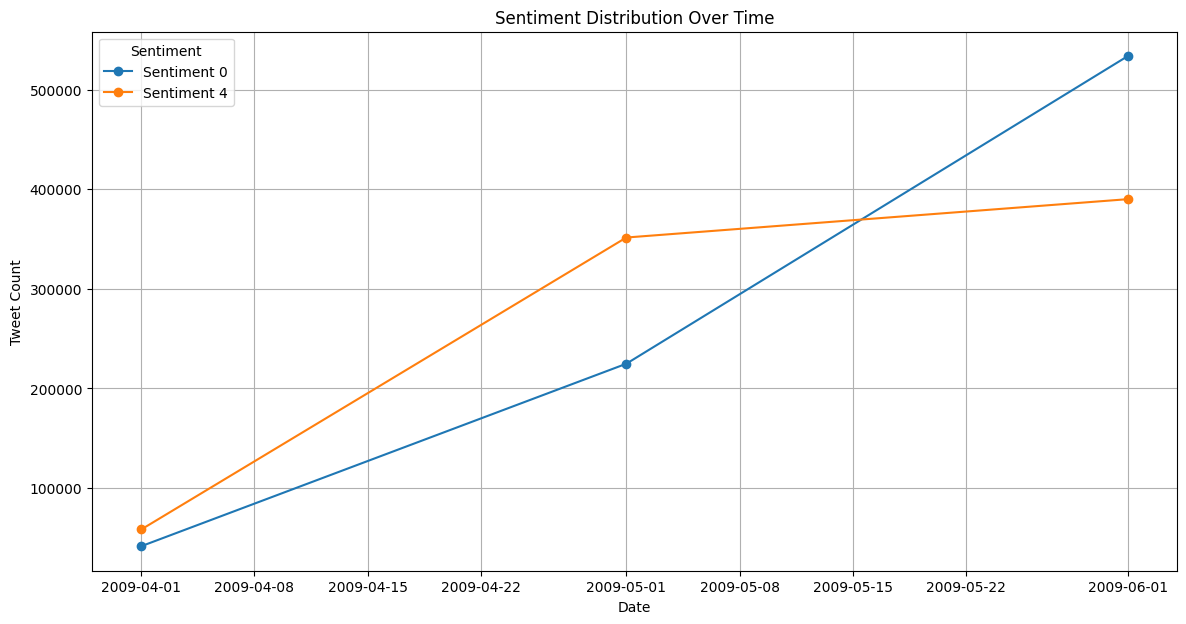

In [26]:
# Calculating sentiment distribution over time (count of each sentiment class)
monthly_sentiment_distribution = df.groupby(['Year', 'Month', 'Target']).size().unstack(fill_value=0).reset_index()

# Creating a datetime column for plotting
monthly_sentiment_distribution['YearMonth'] = pd.to_datetime(monthly_sentiment_distribution[['Year', 'Month']].assign(DAY=1))

# Plotting the sentiment distribution over time
plt.figure(figsize=(14, 7))
for sentiment in monthly_sentiment_distribution.columns[2:-1]:  # Exclude 'Year', 'Month', and 'YearMonth'
    plt.plot(monthly_sentiment_distribution['YearMonth'], monthly_sentiment_distribution[sentiment], marker='o', label=f'Sentiment {sentiment}')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Sentiment Distribution Over Time')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


**-------------------------------------------------------------------------------------------------------------**


**<u>7. TEXT PREPROCESSING</u>**

In [27]:
df.columns

Index(['Target', 'ID', 'Date', 'Flag', 'Username', 'Tweet',
       'Number of characters in the Tweet', 'Year', 'Month', 'Day', 'Hour',
       'DayOfWeek'],
      dtype='object')

In [28]:
df.drop(['Flag'], axis=1, inplace=True)


In [29]:
df.head()

,Target,ID,Date,Username,Tweet,Number of characters in the Tweet,Year,Month,Day,Hour,DayOfWeek
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009,4,6,22,0
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,111,2009,4,6,22,0
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009,4,6,22,0
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,47,2009,4,6,22,0
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009,4,6,22,0


**-----> Removing stop words, special characters, and URLs from the 'Tweet' column**

In [30]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Defining a function to clean tweets

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove special characters
    tweet = re.sub(r'\@\w+|\#','', tweet)
    tweet = re.sub(r'[^A-Za-z0-9\s]+', '', tweet)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tweet = ' '.join([word for word in tweet.split() if word.lower() not in stop_words])
    return tweet


df['Cleaned_Tweet'] = df['Tweet'].apply(clean_tweet)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Target,ID,Date,Username,Tweet,Number of characters in the Tweet,Year,Month,Day,Hour,DayOfWeek,Cleaned_Tweet
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009,4,6,22,0,thats bummer shoulda got David Carr Third Day
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,111,2009,4,6,22,0,upset cant update Facebook texting might cry r...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009,4,6,22,0,dived many times ball Managed save 50 rest go ...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,47,2009,4,6,22,0,whole body feels itchy like fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009,4,6,22,0,behaving im mad cant see


**--------> <u>Tokenization</u>** ***is the process of breaking down a text into smaller units called tokens. These tokens could be words, phrases, symbols, or other meaningful elements. The goal of **<u>lemmatization</u>** is to group together different inflected forms of a word so they can be analyzed as a single item.***

In [31]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from joblib import Parallel, delayed

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure the necessary NLTK data packages are downloaded
nltk.download('punkt')
nltk.download('wordnet')


# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Initialize WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each tokenized word
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Return the lemmatized tokens as a string
    return ' '.join(lemmatized_tokens)

# Apply tokenization and lemmatization to the 'Tweet' column
df['Processed_Tweet'] = df['Tweet'].apply(tokenize_and_lemmatize)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
df.head()

,Target,ID,Date,Username,Tweet,Number of characters in the Tweet,Year,Month,Day,Hour,DayOfWeek,Cleaned_Tweet,Processed_Tweet
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009,4,6,22,0,thats bummer shoulda got David Carr Third Day,@ switchfoot http : //twitpic.com/2y1zl - Awww...
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,111,2009,4,6,22,0,upset cant update Facebook texting might cry r...,is upset that he ca n't update his Facebook by...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009,4,6,22,0,dived many times ball Managed save 50 rest go ...,@ Kenichan I dived many time for the ball . Ma...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,47,2009,4,6,22,0,whole body feels itchy like fire,my whole body feel itchy and like it on fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009,4,6,22,0,behaving im mad cant see,"@ nationwideclass no , it 's not behaving at a..."


***------------------------------------------------------------------------------------------------------------------------------------------***

**<u>8. SENTIMENT PREDICTION MODEL</u>**

**--------> Applying CountVectorizer to Transform Tweets into BoW (bag of words) . Instead of converting the sparse matrix to a dense DataFrame I am using 'Sparse Representation' which is more memory efficient.**

In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Ensure the necessary NLTK data packages are downloaded
nltk.download('punkt')
nltk.download('wordnet')
# Initializing the CountVectorizer
vectorizer = CountVectorizer()

# Fitting and transforming the cleaned tweets to BoW (keeping it in sparse format)
bow_matrix = vectorizer.fit_transform(df['Cleaned_Tweet'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**----> <u>TF-IDF (Term Frequency-Inverse Document Frequency)</u>: Adjusting the weight of words based on their frequency in the document relative to their frequency in the corpus.**


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [36]:
# Initializing the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting and transforming the cleaned tweets to TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Tweet'])



**--------->Word Embeddings using SpaCy representing words in dense vectors.**

In [46]:
import pandas as pd
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_md")



# Function to preprocess text using spaCy (tokenize, lemmatize, and remove stop words)
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

# Apply preprocessing to the 'Tweet' column
df['Processed_Tweet'] = df['Tweet'].apply(preprocess_text)

# Function to get word embeddings for a given text
def get_word_embeddings(text):
    doc = nlp(text)
    return doc.vector

# Apply word embeddings to the 'Processed_Tweet' column
df['Embeddings'] = df['Processed_Tweet'].apply(get_word_embeddings)

# Display the original, processed text, and embeddings
print("Original Text:")
print(df['Tweet'])
print("\nProcessed Text:")
print(df['Processed_Tweet'])
print("\nWord Embeddings:")
print(df['Embeddings'])

# Example: Accessing the embeddings for further analysis
print("\nShape of the embeddings for the first tweet:", df['Embeddings'][0].shape)


In [38]:
df.head()

,Target,ID,Date,Username,Tweet,Number of characters in the Tweet,Year,Month,Day,Hour,DayOfWeek,Cleaned_Tweet,Processed_Tweet
0,0,1467810369,2009-04-06 22:19:45,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,2009,4,6,22,0,thats bummer shoulda got David Carr Third Day,@ switchfoot http : //twitpic.com/2y1zl - Awww...
1,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,111,2009,4,6,22,0,upset cant update Facebook texting might cry r...,is upset that he ca n't update his Facebook by...
2,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Man...,89,2009,4,6,22,0,dived many times ball Managed save 50 rest go ...,@ Kenichan I dived many time for the ball . Ma...
3,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,47,2009,4,6,22,0,whole body feels itchy like fire,my whole body feel itchy and like it on fire
4,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all....",111,2009,4,6,22,0,behaving im mad cant see,"@ nationwideclass no , it 's not behaving at a..."


**------> Feature Extraction Using TF-IDF. Convert the cleaned text data into numerical features using TF-IDF.**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Tweet'], df['Target'], test_size=0.2, random_state=42)
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


**---------------> Model Training .train a logistic regression model using the TF-IDF features.**

In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=200)

**-------------> Model Evaluation:  Evaluating the model's performance on the test data.**

In [41]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.77      0.78    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



<u>CONCLUSION: </u>

The classification report shows a solid performance with balanced precision, recall, and F1-scores for both classes. However, there is always room for improvement. 
Hyperparameter Tuning: Wel used the  technique  like Grid Search to find the best hyperparameters for our model.

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solver
}

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=200)

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='f1_weighted', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_log_reg.predict(X_test_tfidf)

# Evaluate the best model
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.79      0.77      0.78    159494
           4       0.78      0.80      0.79    160506

    accuracy                           0.78    320000
   macro avg       0.79      0.78      0.78    320000
weighted avg       0.79      0.78      0.78    320000



**9. <u> FEATURE IMPORTANCE </u>**

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              feature  coefficient  abs_coefficient
281446            sad   -11.526442        11.526442
206105           miss    -7.649917         7.649917
248568           poor    -7.198054         7.198054
154620          hurts    -6.874077         6.874077
344800  unfortunately    -6.788865         6.788865
281661          sadly    -6.732319         6.732319
294508           sick    -6.704086         6.704086
91584   disappointing    -6.596638         6.596638
137705         gutted    -6.559430         6.559430
206191        missing    -6.411375         6.411375


C:\Users\Aarya\AppData\Local\Temp\ipykernel_2616\1214856584.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abs_coefficient', y='feature', data=top_features, palette='viridis')


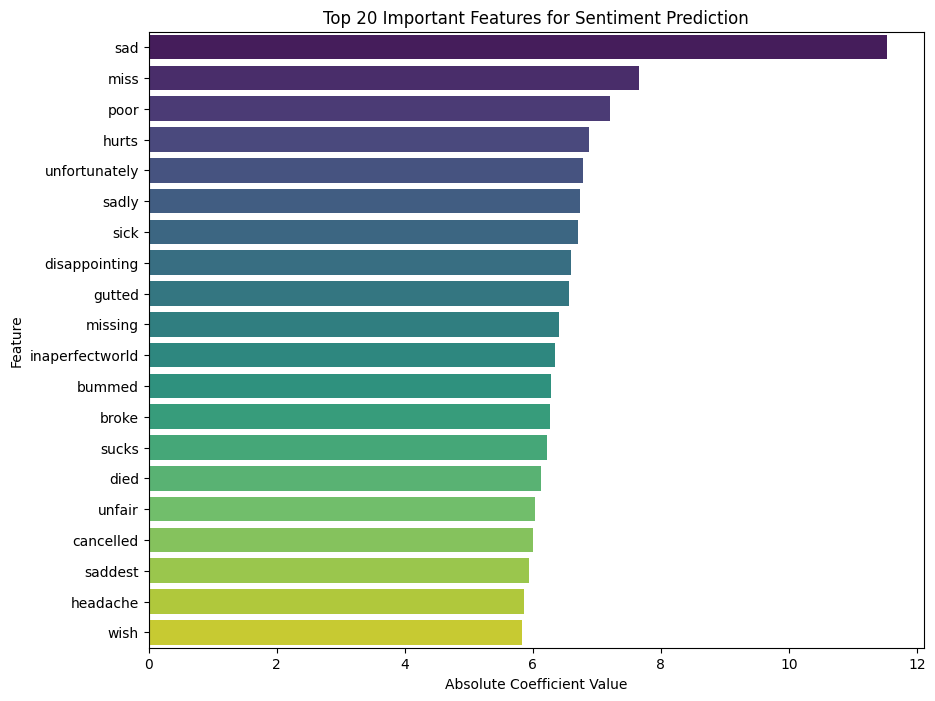

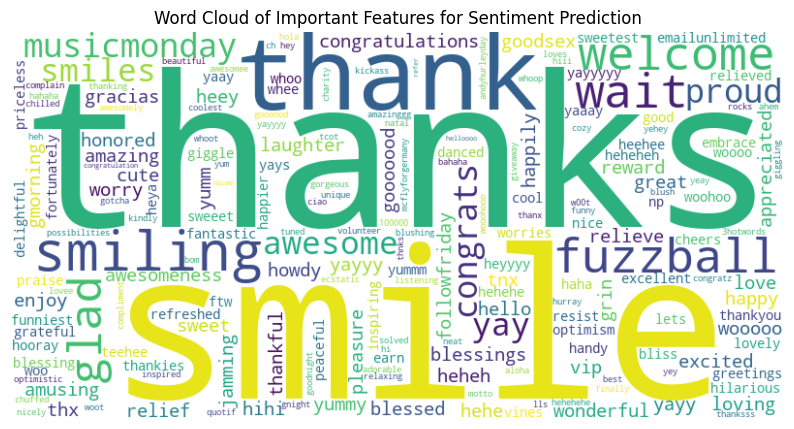

In [43]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Display the top 10 most important features
print(feature_importance.head(10))

# Get the top 20 most important features
top_features = feature_importance.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='abs_coefficient', y='feature', data=top_features, palette='viridis')
plt.title('Top 20 Important Features for Sentiment Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    {word: coeff for word, coeff in zip(feature_importance['feature'], feature_importance['coefficient'])}
)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Important Features for Sentiment Prediction')
plt.show()
